# Filtering and predicting using darts filters
In this notebook, we will look at the Kalman filtering algorithm used to calculate more precise GPS data from noise affected sensors and measurements.


As an example, we will use the [daily Taxi GPS log coordinates](https://www.microsoft.com/en-us/research/publication/t-drive-trajectory-data-sample/).

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import KalmanFilter




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 

## Read the data

In [3]:
df = pd.read_csv('taxi_gps_dataset.csv', delimiter=",", names=['taxi_id', 'time', 'long', 'lat']) # 6184.txt from the original GPS log dataset
train_long = TimeSeries.from_dataframe(df, value_cols=['long'])
train_lat  = TimeSeries.from_dataframe(df, value_cols=['lat'])


## Configure the kalman filters and use it to adjust the measured data.

Default Kalman configuration allows for a general purpose data filtering.

In [4]:

#Longitude and latitude training pairs as a separate TimeSeries
train_long = TimeSeries.from_dataframe(df, value_cols=['long'])
train_lat  = TimeSeries.from_dataframe(df, value_cols=['lat'])

kl_long = KalmanFilter()
kl_lat = KalmanFilter()



## Compare real and predicted coordinates
Sometimes GPS updates are delayed or less accurate, however Kalman filter can filter out gaussian type of noise which is very typical for a GPS sensors readings.

The following snippet will draw each position as a dot on the attached map of city of Beijing

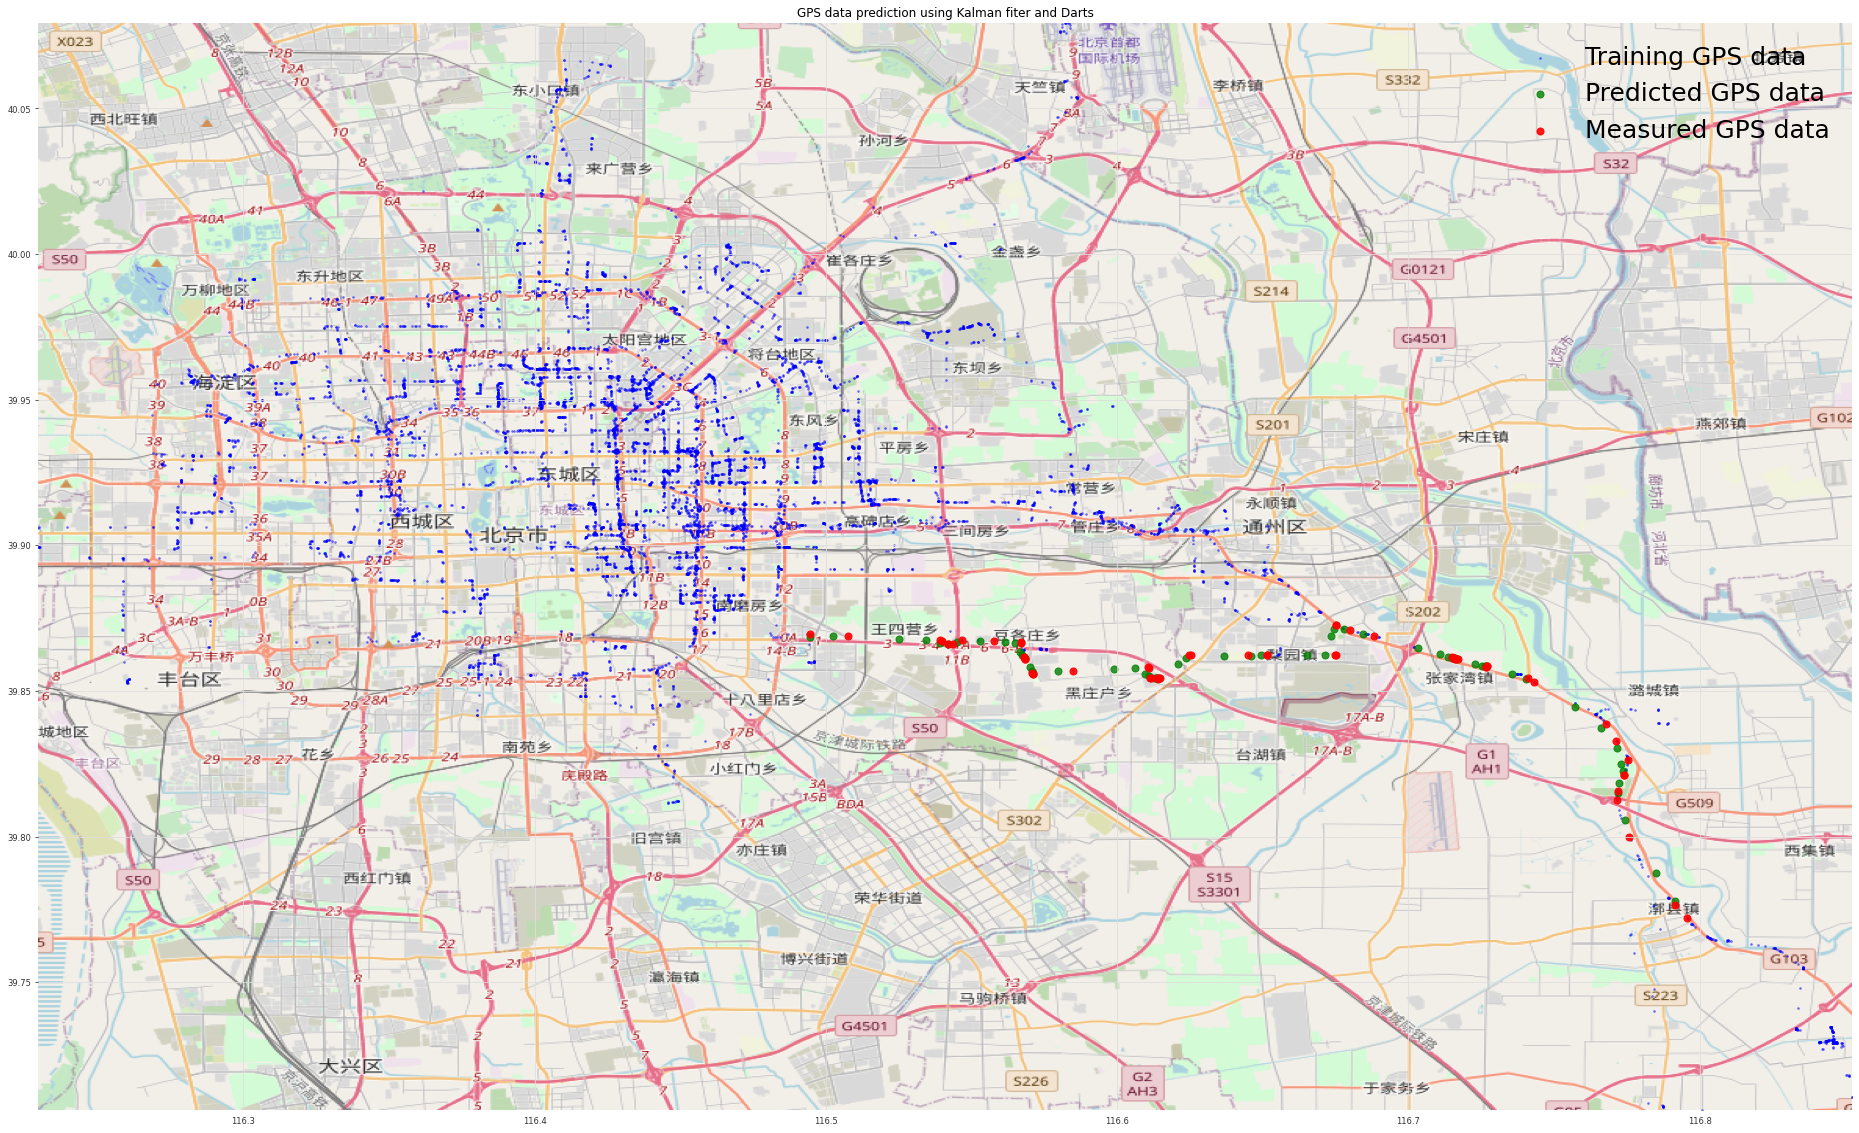

In [5]:
start = 5515
end = 5575

BBox = (df.long.min(),   df.long.max(), df.lat.min(), df.lat.max())

ruh_m = plt.imread('static/images/gps_map.png')
fig, ax = plt.subplots(figsize = (40,20))

predition_long = kl_long.filter(train_long).values()[start:end]
predition_lat = kl_lat.filter(train_lat).values()[start:end]
meas_long = df.long[start:end]
meas_lat = df.lat[start:end]

ax.scatter(df.long, df.lat, zorder=1, alpha= 0.4, c='b', s=3, label='Training GPS data')
ax.scatter(predition_long, predition_lat, zorder=1, alpha= 0.8, c='g', s=50, label='Predicted GPS data')
ax.scatter(meas_long, meas_lat, zorder=1, alpha= 0.9, c='r', s=50, label='Measured GPS data')

ax.set_title('GPS data prediction using Kalman fiter and Darts')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
ax.legend(fontsize=25)

#plt.savefig('gps_data_prediction.png')
plt.show()